<a href="https://colab.research.google.com/github/gtzan/csc349A_tzanetakis/blob/main/notebooks/CSC349A_gaussian_elimination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 349A. Numerical Analysis
### George Tzanetakis, Fall 2025

## Gaussian elimination visualization

These notebooks have been written to support the teaching of Numerical Analysis at the University of Victoria, Canada.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation

In [ ]:
def generate_system(n, min_v=-1, max_v=1, seed=None):
    if seed is not None:
        np.random.seed(seed)
    A = np.random.uniform(low=min_v, high=max_v, size=(n,n))
    b = np.random.uniform(low=min_v, high=max_v, size=(n,1))
    return A, b

In [ ]:
generate_system(3)

(array([[-0.46663347, -0.23019222,  0.77815632],
        [-0.34476847,  0.74954967,  0.81053729],
        [ 0.88174977,  0.5322017 , -0.64474495]]),
 array([[0.74054598],
        [0.14239212],
        [0.63806785]]))

In [ ]:
def gaussian_elimination_steps(A, b):
    n = len(A)
    Ab = np.hstack((A.copy(), b.copy()))  # augmented matrix
    steps = [Ab.copy()]

    for i in range(n):
        # Main element
        pivot = np.argmax(np.abs(Ab[i:, i])) + i
        if pivot != i:
            Ab[[i, pivot]] = Ab[[pivot, i]]

        # Normalization
        Ab[i] = Ab[i] / Ab[i, i]

        # Zeros
        for j in range(i + 1, n):
            Ab[j] = Ab[j] - Ab[j, i] * Ab[i]

        steps.append(Ab.copy())

    return steps

In [ ]:
gaussian_elimination_steps(*generate_system(3))
# gaussian_elimination_steps(*generate_system(n)) -> gaussian_elimination_steps(*(A, b)) -> gaussian_elimination_steps(A, b)
# * -> expand the brackets

[array([[ 0.78278463, -0.14993979, -0.05270811, -0.09255118],
        [ 0.90320019,  0.25943577,  0.72162505, -0.09532012],
        [-0.13463417, -0.3782421 , -0.69833538, -0.14566409]]),
 array([[ 1.        ,  0.28724061,  0.79896468, -0.10553598],
        [ 0.        , -0.37478732, -0.67812538, -0.00993924],
        [ 0.        , -0.3395697 , -0.59076744, -0.15987284]]),
 array([[ 1.        ,  0.28724061,  0.79896468, -0.10553598],
        [-0.        ,  1.        ,  1.8093605 ,  0.02651968],
        [ 0.        ,  0.        ,  0.02363656, -0.15086756]]),
 array([[ 1.        ,  0.28724061,  0.79896468, -0.10553598],
        [-0.        ,  1.        ,  1.8093605 ,  0.02651968],
        [ 0.        ,  0.        ,  1.        , -6.3828048 ]])]

In [ ]:
def plot_matrix_steps(steps):
    num_steps = len(steps)
    cmap = plt.get_cmap("PiYG")

    fig, axes = plt.subplots(num_steps, 1, figsize=(4, 3 * num_steps))
    if num_steps == 1:
        axes = [axes]

    all_vals = np.concatenate(steps).ravel()
    norm = mcolors.TwoSlopeNorm(vcenter=0, vmin=all_vals.min(), vmax=all_vals.max())

    for i, Ab in enumerate(steps):
        ax = axes[i]
        im = ax.imshow(Ab, cmap=cmap, norm=norm)
        ax.set_title(f"Step {i}")
        ax.axis("off")


    fig.colorbar(im, ax=axes, fraction=0.025, pad=0.04)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-1078051601.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


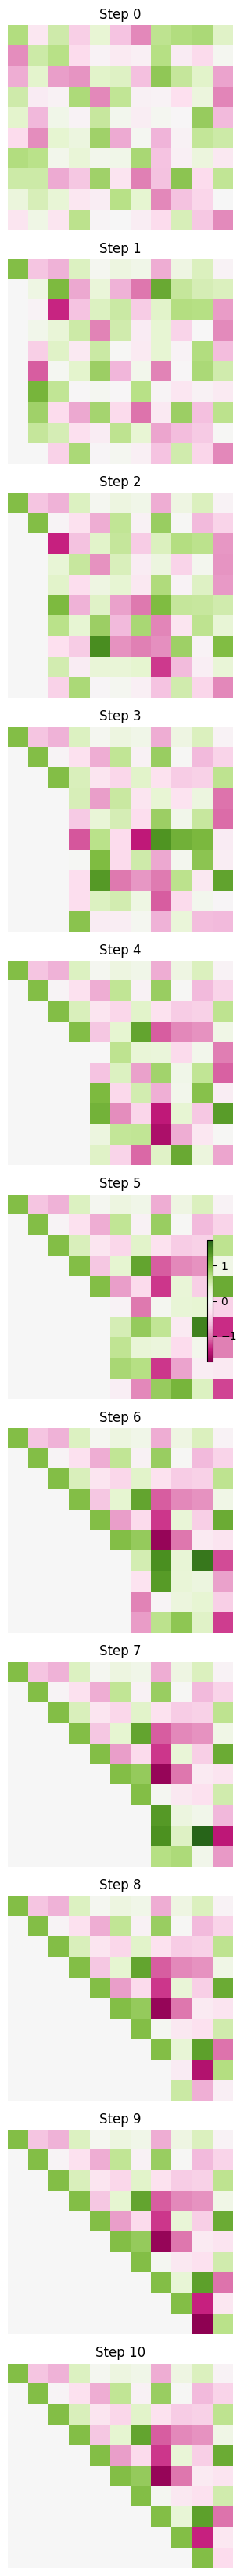

In [ ]:
plot_matrix_steps(gaussian_elimination_steps(*generate_system(10, -1, 1)))

In [ ]:
def animate_gaussian(steps, col_map='PiYG', interval=1000, save_gif=True, filename="gaussian_elimination.gif"):
    fig, ax = plt.subplots(figsize=(10, 10))
    cmap = plt.get_cmap(col_map)

    all_vals = np.concatenate(steps).ravel()
    norm = mcolors.TwoSlopeNorm(vcenter=0, vmin=all_vals.min(), vmax=all_vals.max())

    img = ax.imshow(steps[0], cmap=cmap, norm=norm)
    ax.set_title("Step 0")
    ax.axis("off")
    plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)

    def update(frame):
        img.set_data(steps[frame])
        ax.set_title(f"Step {frame}/{len(steps)-1}")
        return [img]

    anim = FuncAnimation(
        fig, update, frames=len(steps),
        interval=interval, blit=True, repeat=True
    )

    if save_gif:
        anim.save(filename, writer="pillow", fps=2)
        print(f"✅ Saved: {filename}")

    plt.show()

https://matplotlib.org/stable/users/explain/colors/colormaps.html

✅ Saved: gaussian_elimination.gif


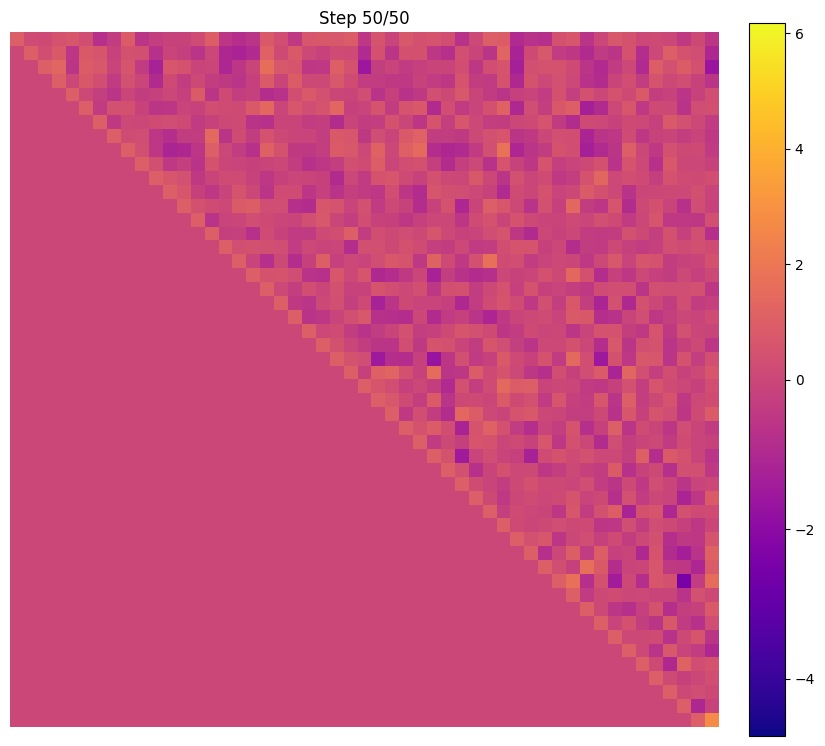

In [ ]:
animate_gaussian(gaussian_elimination_steps(*generate_system(50)), col_map='plasma')

In Google Colab You cannot see gif in show() method, but can use it:

In [ ]:
from IPython.display import Image
Image(filename="gaussian_elimination.gif")


FileNotFoundError: [Errno 2] No such file or directory: 'gaussian_elimination.gif'

In [ ]:
n = 5
A, b = generate_system(n, seed=42)
steps = gaussian_elimination_steps(A, b)

/tmp/ipython-input-1078051601.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


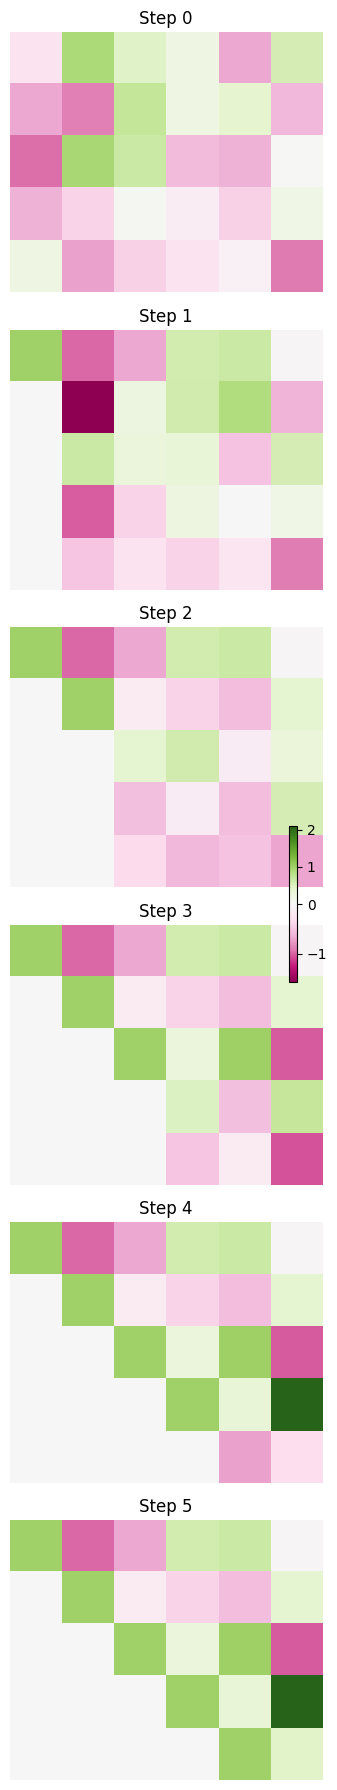

In [ ]:
plot_matrix_steps(steps)

✅ Saved: gaussian_elimination.gif


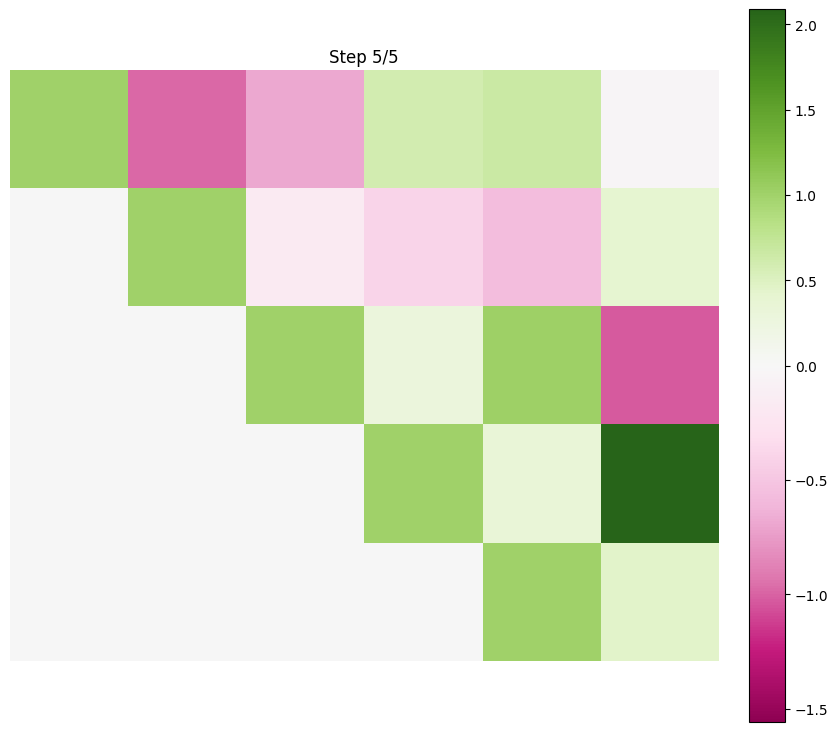

In [ ]:
animate_gaussian(steps, interval=1000, save_gif=True)